<a href="https://colab.research.google.com/github/NaziraSH/HomeWork_1/blob/main/%D0%A8%D0%B0%D0%B9%D1%85%D0%BB%D0%B5%D0%B5%D0%B2%D0%B0_%D0%9B%D0%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для создания модели классификации текста в Python:

1. Импорт библиотек
2. Импорт набора данных
3. Разведывательный анализ данных (EDA)
4. Обработка текста
5. Преобразование текста в числа (векторизация)
6. Наборы для обучения и тестирования
7. Оценка модели



##1. Импорт библиотек


In [1]:
# модули для работы с табличными данными
import numpy as np 
import pandas as pd
# модули для получения графиков
import matplotlib.pyplot as plt
import seaborn as sns
# модули для работы с текстом
import re
import string
# специальные NLP модули
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [2]:
# Следующий код пропускает предупреждения Python из выходных данных
import warnings
warnings.filterwarnings("ignore")

##2. Импорт набора данных 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle/train.csv')

##3. Разведывательный анализ данных (EDA)

In [5]:
# просмотр первых 4 строк
train.head(4)

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность
0,1,Начнем сначала. На картине изображено 2 лица: ...,35,44,38,65
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",35,44,38,65
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",39,41,47,41
3,4,На картине двое: бабушка и внук. Молодость и с...,39,41,47,41


In [6]:
# просмотр последних 4 строк
train.tail(4)

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность
396,397,На картине я вижу мужчину-пахаря. Он со своим ...,58,48,61,59
397,398,Я не буду спешить с покупками. Я постараюсь вс...,58,48,61,59
398,399,На картине изображена деревня. Женщина справа ...,39,53,55,38
399,400,"Пошел бы в лучший ресторан города, заказал то,...",39,53,55,38


In [7]:
# количество строк, наименование столбцов, количество непустых строк в них, тип данных в каждом столбце, столько памяти занимает 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            400 non-null    int64 
 1   текст                         400 non-null    object
 2   интроверсия/экстраверсия      400 non-null    int64 
 3   формализм/любознательность    400 non-null    int64 
 4   небрежность/пунктуальность    400 non-null    int64 
 5   уравновешенность/тревожность  400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [8]:
# поиск пропущенных значений
train.isnull().sum()

id                              0
текст                           0
интроверсия/экстраверсия        0
формализм/любознательность      0
небрежность/пунктуальность      0
уравновешенность/тревожность    0
dtype: int64

In [9]:
print(train.shape)

(400, 6)


In [10]:
# применение функции к каждой строке или столбцу в фрейме данных с помощью pandas.apply(), по данным значениям далее сможем определить тип личности
train['психика'] = train['интроверсия/экстраверсия'].apply(lambda x: 'И' if x<50 else 'Э')
train['природа'] = train['формализм/любознательность'].apply(lambda x: 'Ф' if x<50 else 'Л')
train['сознание'] = train['небрежность/пунктуальность'].apply(lambda x: 'Н' if x<50 else 'П')
train['нейротизм'] = train['уравновешенность/тревожность'].apply(lambda x: 'У' if x<50 else 'Т')

In [11]:
train.head(4)

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность,психика,природа,сознание,нейротизм
0,1,Начнем сначала. На картине изображено 2 лица: ...,35,44,38,65,И,Ф,Н,Т
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",35,44,38,65,И,Ф,Н,Т
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",39,41,47,41,И,Ф,Н,У
3,4,На картине двое: бабушка и внук. Молодость и с...,39,41,47,41,И,Ф,Н,У


In [12]:
train['тип'] = train['психика']+train['природа']+train['сознание']+train['нейротизм']

In [13]:
train.head(4)

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность,психика,природа,сознание,нейротизм,тип
0,1,Начнем сначала. На картине изображено 2 лица: ...,35,44,38,65,И,Ф,Н,Т,ИФНТ
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",35,44,38,65,И,Ф,Н,Т,ИФНТ
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",39,41,47,41,И,Ф,Н,У,ИФНУ
3,4,На картине двое: бабушка и внук. Молодость и с...,39,41,47,41,И,Ф,Н,У,ИФНУ


In [14]:
#подсчет количества типов 
train['тип'].value_counts()

ЭЛПТ    89
ЭЛПУ    77
ИЛПУ    35
ИЛПТ    30
ЭФПТ    22
ЭЛНТ    22
ИФНТ    20
ЭЛНУ    18
ИФПТ    16
ЭФНТ    13
ИФНУ    12
ЭФПУ    12
ИФПУ    11
ЭФНУ    10
ИЛНТ    10
ИЛНУ     3
Name: тип, dtype: int64

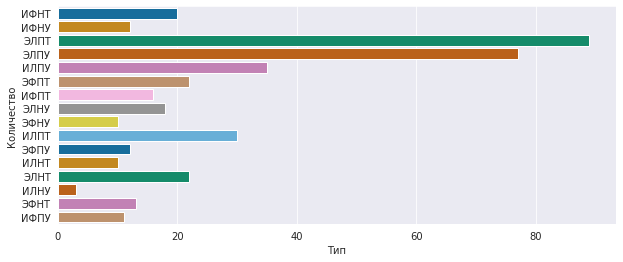

In [15]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')
sns.countplot(y='тип', data=train, palette='colorblind')

plt.xlabel('Тип')
plt.ylabel('Количество')
plt.show()

Самые высокорейтинговые типы это ЭЛПТ, ЭЛПУ, ИЛПУ

In [16]:
train['психика'] = train['психика'].apply(lambda x: 0 if x == 'И' else 1)
train['природа'] = train['природа'].apply(lambda x: 0 if x == 'Ф' else 1)
train['сознание'] = train['сознание'].apply(lambda x: 0 if x == 'Н' else 1)
train['нейротизм'] = train['нейротизм'].apply(lambda x: 0 if x == 'У' else 1)

In [17]:
train.head(4)

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность,психика,природа,сознание,нейротизм,тип
0,1,Начнем сначала. На картине изображено 2 лица: ...,35,44,38,65,0,0,0,1,ИФНТ
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",35,44,38,65,0,0,0,1,ИФНТ
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",39,41,47,41,0,0,0,0,ИФНУ
3,4,На картине двое: бабушка и внук. Молодость и с...,39,41,47,41,0,0,0,0,ИФНУ


##4. Обработка текста

4.1. Чистка текста от стоп-слов

In [18]:
nsw = train
nsw

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность,психика,природа,сознание,нейротизм,тип
0,1,Начнем сначала. На картине изображено 2 лица: ...,35,44,38,65,0,0,0,1,ИФНТ
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",35,44,38,65,0,0,0,1,ИФНТ
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",39,41,47,41,0,0,0,0,ИФНУ
3,4,На картине двое: бабушка и внук. Молодость и с...,39,41,47,41,0,0,0,0,ИФНУ
4,5,"Привет, Маш! Как давно я не писала тебе! Все с...",58,70,58,51,1,1,1,1,ЭЛПТ
...,...,...,...,...,...,...,...,...,...,...,...
395,396,"Сначала я куплю себе большой дом за городом, м...",44,45,46,40,0,0,0,0,ИФНУ
396,397,На картине я вижу мужчину-пахаря. Он со своим ...,58,48,61,59,1,0,1,1,ЭФПТ
397,398,Я не буду спешить с покупками. Я постараюсь вс...,58,48,61,59,1,0,1,1,ЭФПТ
398,399,На картине изображена деревня. Женщина справа ...,39,53,55,38,0,1,1,0,ИЛПУ


In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))

In [21]:
print(stop_words)

{'можно', 'потому', 'к', 'где', 'они', 'же', 'при', 'тебя', 'уж', 'совсем', 'ведь', 'через', 'тоже', 'вас', 'над', 'кто', 'а', 'куда', 'чем', 'раз', 'будет', 'много', 'меня', 'ничего', 'под', 'больше', 'чтоб', 'про', 'она', 'всегда', 'мы', 'за', 'иногда', 'вы', 'сейчас', 'было', 'более', 'нет', 'тогда', 'разве', 'все', 'потом', 'другой', 'до', 'бы', 'уже', 'наконец', 'тут', 'вот', 'зачем', 'что', 'ним', 'были', 'мне', 'тем', 'без', 'с', 'хоть', 'тот', 'свою', 'ли', 'хорошо', 'всю', 'то', 'там', 'никогда', 'только', 'того', 'себя', 'перед', 'их', 'им', 'его', 'впрочем', 'этой', 'ее', 'сам', 'ему', 'опять', 'такой', 'на', 'лучше', 'во', 'по', 'была', 'да', 'всего', 'я', 'том', 'когда', 'нельзя', 'вам', 'в', 'них', 'этом', 'ж', 'него', 'нас', 'если', 'так', 'не', 'ты', 'себе', 'этот', 'как', 'какой', 'почти', 'вдруг', 'два', 'какая', 'он', 'моя', 'об', 'конечно', 'ни', 'эти', 'даже', 'из', 'после', 'этого', 'один', 'нибудь', 'может', 'еще', 'эту', 'теперь', 'чуть', 'был', 'всех', 'чтобы',

In [22]:
#Добавление стоп-слов в список
new_stopwords = ['очень', 'так', 'это', 'как', 'в', 'Я', 'В', 'мы', 'мой', 'вы', 'ваш', 'где-то', 'что-то', 'зачем-то', 'как-то', 'какой-то', 'около', 'порядка', 'примерно', 'всего', 'на самом деле', 'допустим', 'скажем', 'скажу']
stop_words.update(new_stopwords)
#Создаем набор
final_stop_words = set(stop_words)
print(final_stop_words)

{'можно', 'Я', 'потому', 'допустим', 'к', 'где', 'они', 'же', 'при', 'тебя', 'скажу', 'уж', 'порядка', 'совсем', 'ведь', 'через', 'зачем-то', 'тоже', 'вас', 'над', 'кто', 'а', 'куда', 'чем', 'раз', 'будет', 'много', 'меня', 'ничего', 'под', 'больше', 'чтоб', 'про', 'она', 'всегда', 'мы', 'за', 'иногда', 'вы', 'сейчас', 'было', 'более', 'нет', 'тогда', 'разве', 'все', 'потом', 'другой', 'как-то', 'до', 'бы', 'уже', 'наконец', 'тут', 'вот', 'зачем', 'примерно', 'что', 'ним', 'были', 'мне', 'тем', 'без', 'с', 'хоть', 'тот', 'свою', 'где-то', 'около', 'ли', 'хорошо', 'всю', 'то', 'там', 'никогда', 'только', 'того', 'себя', 'перед', 'их', 'ваш', 'это', 'им', 'его', 'впрочем', 'этой', 'скажем', 'ее', 'сам', 'ему', 'опять', 'такой', 'на', 'лучше', 'во', 'что-то', 'по', 'была', 'да', 'всего', 'я', 'том', 'когда', 'нельзя', 'вам', 'в', 'них', 'этом', 'ж', 'него', 'нас', 'какой-то', 'если', 'так', 'не', 'ты', 'себе', 'этот', 'как', 'какой', 'почти', 'вдруг', 'очень', 'два', 'какая', 'он', 'моя',

In [23]:
nsw['not stop'] = nsw['текст'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stop_words)]))

In [24]:
nsw.head(4)

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность,психика,природа,сознание,нейротизм,тип,not stop
0,1,Начнем сначала. На картине изображено 2 лица: ...,35,44,38,65,0,0,0,1,ИФНТ,Начнем сначала. На картине изображено 2 лица: ...
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",35,44,38,65,0,0,0,1,ИФНТ,"Здорово, дружище! Давно виделись. У нормально...."
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",39,41,47,41,0,0,0,0,ИФНУ,"Привет, Данил! Как дела? надеюсь, хорошо. Посл..."
3,4,На картине двое: бабушка и внук. Молодость и с...,39,41,47,41,0,0,0,0,ИФНУ,На картине двое: бабушка внук. Молодость старо...


4.2. Текст без знаков препинания и стоп-слов

In [25]:
#Удаление знаков препинания из текста
import unicodedata
import sys

# Создать словарь знаков препинания
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))
# Удалить любые знаки препинания во всех строковых значениях
nsw['not punctuation'] = nsw['not stop'].apply(lambda x: ' '.join([string.translate(punctuation) for string in x.split()]))

In [26]:
nsw

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность,психика,природа,сознание,нейротизм,тип,not stop,not punctuation
0,1,Начнем сначала. На картине изображено 2 лица: ...,35,44,38,65,0,0,0,1,ИФНТ,Начнем сначала. На картине изображено 2 лица: ...,Начнем сначала На картине изображено 2 лица мо...
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",35,44,38,65,0,0,0,1,ИФНТ,"Здорово, дружище! Давно виделись. У нормально....",Здорово дружище Давно виделись У нормально Про...
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",39,41,47,41,0,0,0,0,ИФНУ,"Привет, Данил! Как дела? надеюсь, хорошо. Посл...",Привет Данил Как дела надеюсь хорошо Последний...
3,4,На картине двое: бабушка и внук. Молодость и с...,39,41,47,41,0,0,0,0,ИФНУ,На картине двое: бабушка внук. Молодость старо...,На картине двое бабушка внук Молодость старост...
4,5,"Привет, Маш! Как давно я не писала тебе! Все с...",58,70,58,51,1,1,1,1,ЭЛПТ,"Привет, Маш! Как давно писала тебе! Все свобод...",Привет Маш Как давно писала тебе Все свободное...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,"Сначала я куплю себе большой дом за городом, м...",44,45,46,40,0,0,0,0,ИФНУ,"Сначала куплю большой дом городом, машину. Воз...",Сначала куплю большой дом городом машину Возмо...
396,397,На картине я вижу мужчину-пахаря. Он со своим ...,58,48,61,59,1,0,1,1,ЭФПТ,На картине вижу мужчину-пахаря. Он своим конем...,На картине вижу мужчинупахаря Он своим конем п...
397,398,Я не буду спешить с покупками. Я постараюсь вс...,58,48,61,59,1,0,1,1,ЭФПТ,буду спешить покупками. постараюсь медленно об...,буду спешить покупками постараюсь медленно обд...
398,399,На картине изображена деревня. Женщина справа ...,39,53,55,38,0,1,1,0,ИЛПУ,На картине изображена деревня. Женщина справа ...,На картине изображена деревня Женщина справа ...


4.3. Сплошной текст, без знаков препинания и стоп слов

In [27]:
#текст сплошной без пробелов
nsw['together'] = nsw['not punctuation'].str.split(" ").str.join("")

In [28]:
nsw

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность,психика,природа,сознание,нейротизм,тип,not stop,not punctuation,together
0,1,Начнем сначала. На картине изображено 2 лица: ...,35,44,38,65,0,0,0,1,ИФНТ,Начнем сначала. На картине изображено 2 лица: ...,Начнем сначала На картине изображено 2 лица мо...,НачнемсначалаНакартинеизображено2лицамолодоест...
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",35,44,38,65,0,0,0,1,ИФНТ,"Здорово, дружище! Давно виделись. У нормально....",Здорово дружище Давно виделись У нормально Про...,ЗдороводружищеДавновиделисьУнормальноПродолжаю...
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",39,41,47,41,0,0,0,0,ИФНУ,"Привет, Данил! Как дела? надеюсь, хорошо. Посл...",Привет Данил Как дела надеюсь хорошо Последний...,ПриветДанилКакделанадеюсьхорошоПоследниймесяцн...
3,4,На картине двое: бабушка и внук. Молодость и с...,39,41,47,41,0,0,0,0,ИФНУ,На картине двое: бабушка внук. Молодость старо...,На картине двое бабушка внук Молодость старост...,НакартинедвоебабушкавнукМолодостьстаростьБылое...
4,5,"Привет, Маш! Как давно я не писала тебе! Все с...",58,70,58,51,1,1,1,1,ЭЛПТ,"Привет, Маш! Как давно писала тебе! Все свобод...",Привет Маш Как давно писала тебе Все свободное...,ПриветМашКакдавнописалатебеВсесвободноевремяза...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,"Сначала я куплю себе большой дом за городом, м...",44,45,46,40,0,0,0,0,ИФНУ,"Сначала куплю большой дом городом, машину. Воз...",Сначала куплю большой дом городом машину Возмо...,СначалакуплюбольшойдомгородоммашинуВозможнопол...
396,397,На картине я вижу мужчину-пахаря. Он со своим ...,58,48,61,59,1,0,1,1,ЭФПТ,На картине вижу мужчину-пахаря. Он своим конем...,На картине вижу мужчинупахаря Он своим конем п...,НакартиневижумужчинупахаряОнсвоимконемпашетзем...
397,398,Я не буду спешить с покупками. Я постараюсь вс...,58,48,61,59,1,0,1,1,ЭФПТ,буду спешить покупками. постараюсь медленно об...,буду спешить покупками постараюсь медленно обд...,будуспешитьпокупкамипостараюсьмедленнообдумать...
398,399,На картине изображена деревня. Женщина справа ...,39,53,55,38,0,1,1,0,ИЛПУ,На картине изображена деревня. Женщина справа ...,На картине изображена деревня Женщина справа ...,НакартинеизображенадеревняЖенщинасправаматьдев...


4.4. Текст в нижнем регистре, сплошной, без знаков препинания и стоп-слов

In [29]:
#текст сплошной без пробелов
nsw['lower'] = nsw['together'].apply(lambda x: x.lower()) 

In [30]:
nsw

,id,текст,интроверсия/экстраверсия,формализм/любознательность,небрежность/пунктуальность,уравновешенность/тревожность,психика,природа,сознание,нейротизм,тип,not stop,not punctuation,together,lower
0,1,Начнем сначала. На картине изображено 2 лица: ...,35,44,38,65,0,0,0,1,ИФНТ,Начнем сначала. На картине изображено 2 лица: ...,Начнем сначала На картине изображено 2 лица мо...,НачнемсначалаНакартинеизображено2лицамолодоест...,начнемсначаланакартинеизображено2лицамолодоест...
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",35,44,38,65,0,0,0,1,ИФНТ,"Здорово, дружище! Давно виделись. У нормально....",Здорово дружище Давно виделись У нормально Про...,ЗдороводружищеДавновиделисьУнормальноПродолжаю...,здороводружищедавновиделисьунормальнопродолжаю...
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",39,41,47,41,0,0,0,0,ИФНУ,"Привет, Данил! Как дела? надеюсь, хорошо. Посл...",Привет Данил Как дела надеюсь хорошо Последний...,ПриветДанилКакделанадеюсьхорошоПоследниймесяцн...,приветданилкакделанадеюсьхорошопоследниймесяцн...
3,4,На картине двое: бабушка и внук. Молодость и с...,39,41,47,41,0,0,0,0,ИФНУ,На картине двое: бабушка внук. Молодость старо...,На картине двое бабушка внук Молодость старост...,НакартинедвоебабушкавнукМолодостьстаростьБылое...,накартинедвоебабушкавнукмолодостьстаростьбылое...
4,5,"Привет, Маш! Как давно я не писала тебе! Все с...",58,70,58,51,1,1,1,1,ЭЛПТ,"Привет, Маш! Как давно писала тебе! Все свобод...",Привет Маш Как давно писала тебе Все свободное...,ПриветМашКакдавнописалатебеВсесвободноевремяза...,приветмашкакдавнописалатебевсесвободноевремяза...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,"Сначала я куплю себе большой дом за городом, м...",44,45,46,40,0,0,0,0,ИФНУ,"Сначала куплю большой дом городом, машину. Воз...",Сначала куплю большой дом городом машину Возмо...,СначалакуплюбольшойдомгородоммашинуВозможнопол...,сначалакуплюбольшойдомгородоммашинувозможнопол...
396,397,На картине я вижу мужчину-пахаря. Он со своим ...,58,48,61,59,1,0,1,1,ЭФПТ,На картине вижу мужчину-пахаря. Он своим конем...,На картине вижу мужчинупахаря Он своим конем п...,НакартиневижумужчинупахаряОнсвоимконемпашетзем...,накартиневижумужчинупахаряонсвоимконемпашетзем...
397,398,Я не буду спешить с покупками. Я постараюсь вс...,58,48,61,59,1,0,1,1,ЭФПТ,буду спешить покупками. постараюсь медленно об...,буду спешить покупками постараюсь медленно обд...,будуспешитьпокупкамипостараюсьмедленнообдумать...,будуспешитьпокупкамипостараюсьмедленнообдумать...
398,399,На картине изображена деревня. Женщина справа ...,39,53,55,38,0,1,1,0,ИЛПУ,На картине изображена деревня. Женщина справа ...,На картине изображена деревня Женщина справа ...,НакартинеизображенадеревняЖенщинасправаматьдев...,накартинеизображенадеревняженщинасправаматьдев...


##Преобразование текста в числа (векторизация)

####Поиск TF-IDF
####Подход с использованием набора слов ("Мешок слов") отлично подходит для преобразования текста в числа. Однако у него есть один недостаток. Он присваивает оценку слову на основе его появления в конкретном документе. При этом не учитывается тот факт, что это слово может также часто встречаться в других документах. 
####TF-IDF (Term Frequency — Inverse Dense Frequency) решает эту проблему, умножая частоту термина слова на обратную частоту документа.
####Частота термина рассчитывается как: Term frequency = (Number of Occurrences of a word)/(Total words in the document)
####А частота обратного документа рассчитывается как: IDF(word) = Log((Total number of documents)/(Number of documents containing the word))


####Напрямую преобразовать текстовые документы в значения функций TF-IDF (без предварительного преобразования документов в функции набора слов) можем следующим образом:

In [31]:
vectorizer = TfidfVectorizer()
df_X = vectorizer.fit_transform(nsw['not stop'])

####Чтобы преодолеть проблему высокой размерности в нашей входной матрице, был выполнен латентный семантический анализ (LSA), метод уменьшения размерности, на матрице TF-IDF с использованием разложения по сингулярным значениям (SVD).

####Согласно документации sklearn.decomposition.TruncatedSVD, при выполнении LSA рекомендуется n_components = 100.

In [32]:
svd = TruncatedSVD(n_components = 100)
df_X = svd.fit_transform(df_X)

##Наборы для обучения и тестирования

Как и в случае любой другой задачи машинного обучения с учителем, нам необходимо разделить наши данные на наборы для обучения и тестирования. Разделяем данные на X, обучающий набор и тест.

In [33]:
#Обучающая
X = df_X[:200,:]
#Тест
test = df_X[200:,:]

In [34]:
#Обучающая
X

array([[ 1.38912933e-01,  1.80171949e-01,  1.12748044e-01, ...,
         6.99142970e-02,  4.78136746e-03, -1.10667501e-02],
       [ 1.23706773e-01, -3.30060724e-02,  6.10823755e-03, ...,
         4.24071550e-02,  7.17172072e-02, -1.05564232e-01],
       [ 1.74800096e-01, -1.07265260e-01,  1.00965321e-02, ...,
         1.12845100e-02, -6.93757005e-02,  2.29235980e-02],
       ...,
       [ 2.76351745e-01, -1.75616786e-01, -1.06202339e-02, ...,
         4.86613425e-02,  1.53799183e-02,  2.93304990e-03],
       [ 1.27066988e-01,  1.28134052e-01,  4.82335909e-02, ...,
         5.99961335e-05, -1.98226388e-02, -6.38403402e-02],
       [ 1.65374939e-01, -1.06276633e-01,  3.11780059e-03, ...,
        -3.28422030e-02,  9.42246670e-02, -5.39761434e-02]])

In [35]:
#Тест
test

array([[ 0.13702636,  0.16797997, -0.0481472 , ...,  0.02569534,
        -0.02677755, -0.12954656],
       [ 0.17189924, -0.06260118, -0.00911642, ..., -0.06024761,
         0.0253194 , -0.02929488],
       [ 0.18337156,  0.22990395, -0.12546833, ..., -0.00636446,
         0.01990204,  0.0318528 ],
       ...,
       [ 0.05588799,  0.00208001,  0.00046149, ..., -0.04823021,
         0.06327532,  0.00854142],
       [ 0.14303415,  0.22299104,  0.3932116 , ..., -0.02594682,
         0.0273623 ,  0.00470615],
       [ 0.05117211, -0.00114783, -0.004712  , ...,  0.1278221 ,
         0.08158516,  0.12283633]])

#####**Построение целевых векторов**
#####Взяв четыре двоичные переменные, составляющие целевой «тип», были построены следующие цели:
#####Психика = 0 для интроверта и 1 для экстраверта
#####Природа = 0 для формалиста и 1 для любознательного
#####Сознание = 0 для небрежного и 1 для пунктульного
#####Нейротизм = 0 для уравновешенного и 1 для тревожного

In [36]:
y = nsw['тип'][:200]

y_mind = y.apply(lambda x: 0 if x[0] == 'И' else 1)
y_nature = y.apply(lambda x: 0 if x[1] == 'Ф' else 1)
y_consciousness = y.apply(lambda x: 0 if x[2] == 'Н' else 1)
y_neuroticism = y.apply(lambda x: 0 if x[3] == 'У' else 1)

In [37]:
len(X)

200

In [38]:
df_train = nsw[['id', 'текст', 'психика', 'природа', 'сознание', 'нейротизм']]
df_test = pd.read_csv('/content/drive/MyDrive/Kaggle/test.csv')

#sample_submission = pd.read_csv('/content/drive/MyDrive/Kaggle/random_example.csv')

# Для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['train'] = 1 # помечаем где у нас трейн
df_test['train'] = 0 # помечаем где у нас тест

df = df_train.append(df_test, sort=False).reset_index(drop=True) # объединяем

In [39]:
df_train

,id,текст,психика,природа,сознание,нейротизм,train
0,1,Начнем сначала. На картине изображено 2 лица: ...,0,0,0,1,1
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",0,0,0,1,1
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",0,0,0,0,1
3,4,На картине двое: бабушка и внук. Молодость и с...,0,0,0,0,1
4,5,"Привет, Маш! Как давно я не писала тебе! Все с...",1,1,1,1,1
...,...,...,...,...,...,...,...
395,396,"Сначала я куплю себе большой дом за городом, м...",0,0,0,0,1
396,397,На картине я вижу мужчину-пахаря. Он со своим ...,1,0,1,1,1
397,398,Я не буду спешить с покупками. Я постараюсь вс...,1,0,1,1,1
398,399,На картине изображена деревня. Женщина справа ...,0,1,1,0,1


In [40]:
df

,id,текст,психика,природа,сознание,нейротизм,train
0,1,Начнем сначала. На картине изображено 2 лица: ...,0.0,0.0,0.0,1.0,1
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",0.0,0.0,0.0,1.0,1
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",0.0,0.0,0.0,0.0,1
3,4,На картине двое: бабушка и внук. Молодость и с...,0.0,0.0,0.0,0.0,1
4,5,"Привет, Маш! Как давно я не писала тебе! Все с...",1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...
706,13807,"Половину отдам на обеспечение интернатов, детс...",NaN,NaN,NaN,NaN,0
707,13808,"На мой взгляд, на картине передано чувство пер...",NaN,NaN,NaN,NaN,0
708,13809,Я бы сначала последовал выражению «Кто сам не ...,NaN,NaN,NaN,NaN,0
709,13810,На картине мы видим огород. На огороде работае...,NaN,NaN,NaN,NaN,0


In [41]:
df['not stop'] = df['текст'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stop_words)]))

In [42]:
vectorizer = TfidfVectorizer()
df_X = vectorizer.fit_transform(df['not stop'])

In [43]:
svd = TruncatedSVD(n_components = 100)
df_X = svd.fit_transform(df_X)

In [44]:
df_X

array([[ 0.13316623,  0.18412638,  0.02914865, ..., -0.00734145,
         0.01325675,  0.04833776],
       [ 0.11722181, -0.0337557 ,  0.03441216, ..., -0.03278005,
        -0.01661432,  0.06661484],
       [ 0.14212666, -0.10200218,  0.11758953, ..., -0.0695297 ,
         0.02847769, -0.0124865 ],
       ...,
       [ 0.08165103, -0.00486654,  0.00661145, ..., -0.05945955,
        -0.00255013,  0.00782895],
       [ 0.12411846,  0.23648876,  0.08384732, ...,  0.03791313,
         0.02569225, -0.01423431],
       [ 0.01520036, -0.00864283,  0.01730574, ..., -0.00287422,
         0.02490036, -0.05252357]])

In [45]:
from sklearn import preprocessing
df_X = preprocessing.normalize(df_X)
df_X

array([[ 0.27053702,  0.37406631,  0.05921764, ..., -0.01491471,
         0.02693207,  0.09820173],
       [ 0.32537199, -0.09369552,  0.09551767, ..., -0.09098741,
        -0.04611628,  0.18490247],
       [ 0.27102044, -0.19450732,  0.22423074, ..., -0.13258576,
         0.05430394, -0.02381044],
       ...,
       [ 0.17396215, -0.01036845,  0.01408607, ..., -0.12668195,
        -0.00543319,  0.01668001],
       [ 0.19328045,  0.36826635,  0.13056919, ...,  0.05903929,
         0.04000862, -0.02216604],
       [ 0.03426632, -0.01948362,  0.03901249, ..., -0.00647938,
         0.05613313, -0.11840438]])

In [46]:
X = df_X[:400,:]
test = df_X[401:,:]

In [47]:
y = df[:400]

y_mind = y['психика']
y_nature = y['природа']
y_consciousness = y['сознание']
y_neuroticism = y['нейротизм']

In [48]:
y

,id,текст,психика,природа,сознание,нейротизм,train,not stop
0,1,Начнем сначала. На картине изображено 2 лица: ...,0.0,0.0,0.0,1.0,1,Начнем сначала. На картине изображено 2 лица: ...
1,2,"Здорово, дружище! Давно не виделись. У меня вс...",0.0,0.0,0.0,1.0,1,"Здорово, дружище! Давно виделись. У нормально...."
2,3,"Привет, Данил! Как дела? Я надеюсь, что все х...",0.0,0.0,0.0,0.0,1,"Привет, Данил! Как дела? надеюсь, хорошо. Посл..."
3,4,На картине двое: бабушка и внук. Молодость и с...,0.0,0.0,0.0,0.0,1,На картине двое: бабушка внук. Молодость старо...
4,5,"Привет, Маш! Как давно я не писала тебе! Все с...",1.0,1.0,1.0,1.0,1,"Привет, Маш! Как давно писала тебе! Все свобод..."
...,...,...,...,...,...,...,...,...
395,396,"Сначала я куплю себе большой дом за городом, м...",0.0,0.0,0.0,0.0,1,"Сначала куплю большой дом городом, машину. Воз..."
396,397,На картине я вижу мужчину-пахаря. Он со своим ...,1.0,0.0,1.0,1.0,1,На картине вижу мужчину-пахаря. Он своим конем...
397,398,Я не буду спешить с покупками. Я постараюсь вс...,1.0,0.0,1.0,1.0,1,буду спешить покупками. постараюсь медленно об...
398,399,На картине изображена деревня. Женщина справа ...,0.0,1.0,1.0,0.0,1,На картине изображена деревня. Женщина справа ...


Мы разделили наши данные на набор для обучения и тестирования. Пришло время увидеть настоящие действия. Мы будем использовать алгоритм случайного леса для обучения нашей модели. Вы можете использовать любую другую модель по вашему выбору.

Для обучения нашей модели машинного обучения с использованием алгоритма случайного леса мы будем использовать класс RandomForestClassifier из библиотеки sklearn.ensemble Метод fit этого класса используется для обучения алгоритма. Нам нужно передать в этот метод обучающие данные и наборы обучающих целей.

In [49]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
#from mlxtend.classifier import StackingCVClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import  cross_val_score, GridSearchCV

In [51]:
from sklearn.model_selection import StratifiedKFold
LogR_model = LogisticRegression()
RFC_model = RandomForestClassifier()
SVC_model = SVC(probability = True)
XGB_model = XGBClassifier()

#LDA_model = LinearDiscriminantAnalysis()
#KNN_model = KNeighborsClassifier()
#CART_model = DecisionTreeClassifier()
#NB_model = GaussianNB()


#category = [(y_mind, "психика"), (y_nature, "природа"), (y_consciousness, "сознание"), (y_neuroticism, "нейротизм")]
#models = [(LogR_model, "LOG"), (RFC_model, "RFC"), (SVC_model, 'SVC'), (XGB_model, 'XGB'), (LDA_model, 'LDA'), (KNN_model, 'KNN'), (CART_model, 'CART'), (NB_model, 'NB')]

category = [(y_mind, "психика"), (y_nature, "природа"), (y_consciousness, "сознание"), (y_neuroticism, "нейротизм")]
models = [(LogR_model, "LOG"), (RFC_model, "RFC"), (SVC_model, 'SVC'), (XGB_model, 'XGB')]


In [52]:
for a in category:
    print("-----", a[1], "-----")
    for b in models:
        score = -1*round(np.average(cross_val_score(b[0], X, a[0], cv = 4, scoring = 'neg_log_loss', n_jobs = 4)),5)
        print(b[1], ": ", score)

----- психика -----
LOG :  0.64459
RFC :  0.6419
SVC :  0.64629
XGB :  0.71183
----- природа -----
LOG :  0.60841
RFC :  0.61208
SVC :  0.59886
XGB :  0.77491
----- сознание -----
LOG :  0.58946
RFC :  0.58273
SVC :  0.58552
XGB :  0.71725
----- нейротизм -----
LOG :  0.73116
RFC :  0.70711
SVC :  0.70807
XGB :  0.91796


В таблице показаны значения Log Loss для каждой пары модель-целевая категория. В среднем логистическая регрессия превосходит другие, в то время как XGB имеет самую низкую производительность, поэтому лучше исключить эту модель из дальнейшего рассмотрения.